     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


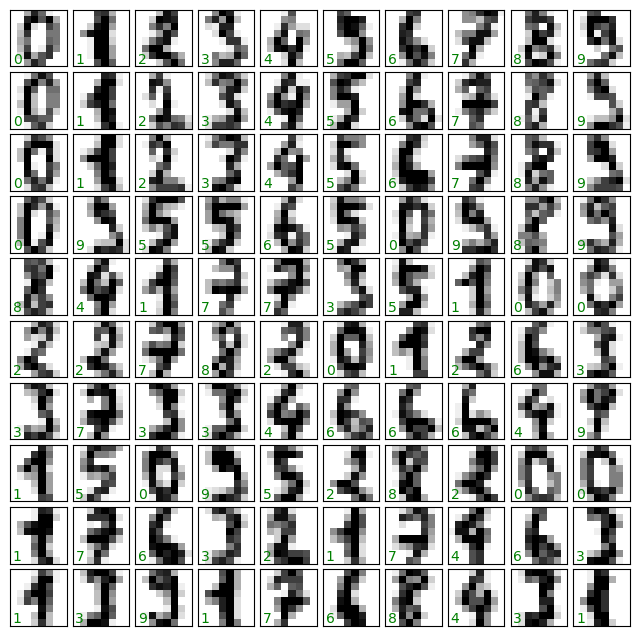

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360



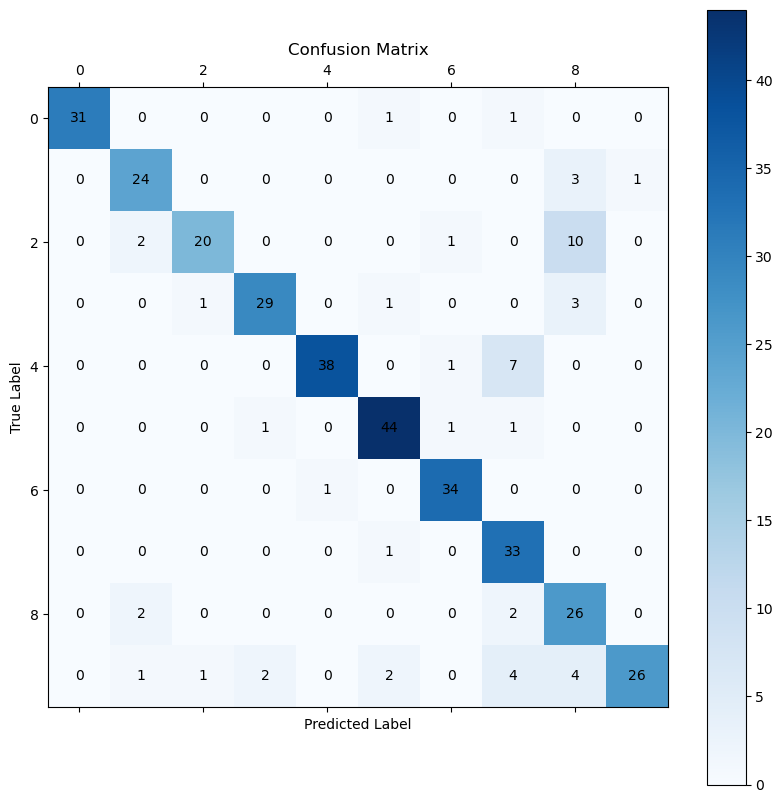

In [1]:
import pandas as pd             # Importing pandas, a library for data handling and analysis.
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization.
from sklearn import datasets     # Importing datasets from sklearn.
from sklearn.naive_bayes import GaussianNB  # Importing Naive Bayes classifier.
from sklearn.model_selection import train_test_split  # A function to split our dataset into training and testing parts.
from sklearn.metrics import classification_report, confusion_matrix  # Tools to measure the performance of our classifier.
import numpy as np  # Importing numpy, a library for handling large, multi-dimensional arrays and matrices.

# We're loading the digits dataset which contains 8x8 images of digits.
digits = datasets.load_digits()

# We're structuring our data in a DataFrame, a 2-D labeled data structure with columns potentially of different types.
df = pd.DataFrame(data=digits.data)
df['target'] = digits.target

# Let's print the first five rows of our dataframe to inspect our data.
print(df.head())

# We're setting up a 10x10 grid of subplots to visualize some of the digits in our dataset.
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# For each subplot, we're displaying an image of a digit and adding a label indicating the true value of the digit.
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

# Displaying the grid of digits.
plt.show()

# Setting up our features (X) and target variable (y).
X = digits.data
y = digits.target

# Splitting our dataset into a training set (to train our model) and a testing set (to validate the model).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up our Naive Bayes classifier model. It's called 'naive' because it assumes features are independent.
gnb = GaussianNB()

# Training our model using the training data.
gnb.fit(X_train, y_train)

# Making predictions on our testing data using the trained model.
y_pred = gnb.predict(X_test)

# Printing a classification report that provides a detailed performance evaluation of our model.
print(classification_report(y_test, y_pred))

# Generating a confusion matrix, which is a summary of correct and incorrect predictions broken down by each category.
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix.
plt.figure(figsize=(10, 10))
plt.matshow(cm, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()

# Annotating our confusion matrix with their respective counts.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

# Adding a title and labels to our confusion matrix plot.
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Displaying our confusion matrix plot.
plt.show()
